# Data-Driven Decision Making Homework 1

### Phionna Teo

## Question 1

In [1]:
 %matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

#Reading the data in
df = pd.read_csv('Customer-Churn.csv')

In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
1,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
2,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
3,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
4,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No


In [2]:
x_cols = df.columns[1:-1]
X = df[x_cols]
Y = df["Churn"]

#Splitting the data into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 5)

In [56]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2655,Female,0,No,No,12,Yes,Yes,DSL,No,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,75.85,854.45
743,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.55,89.55
5570,Male,0,Yes,No,52,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),81.40,4354.45
64,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.80,19.80
3282,Male,0,No,No,16,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,80.55,1248.90


In [57]:
#For descriptive analysis, lets split the data category into those that have factor-type data and those that have numeric data
categorical_headers = list(X_train.columns.values)
categorical_headers = [e for e in categorical_headers if e not in ('tenure','MonthlyCharges','TotalCharges')]

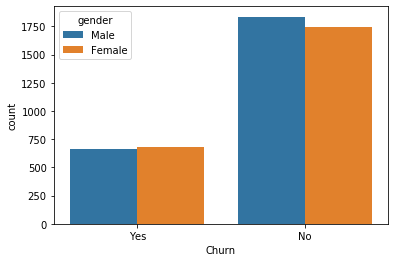

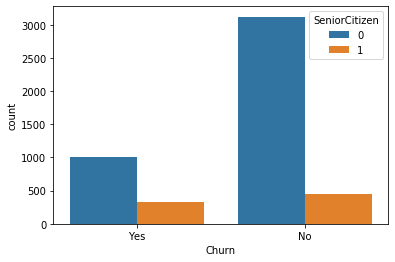

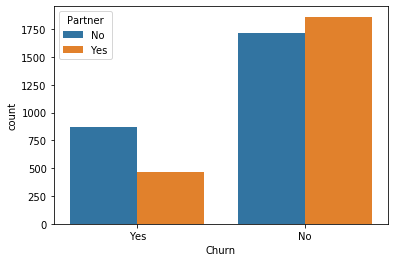

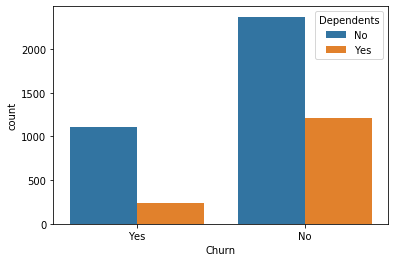

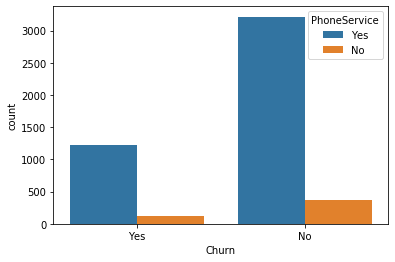

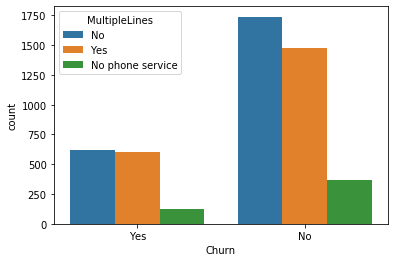

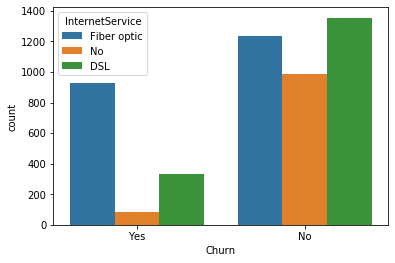

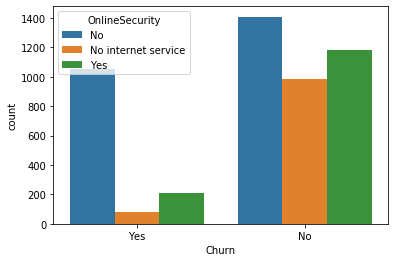

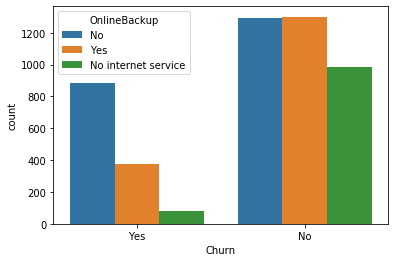

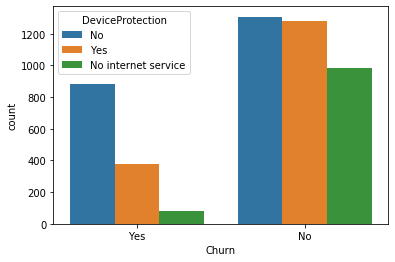

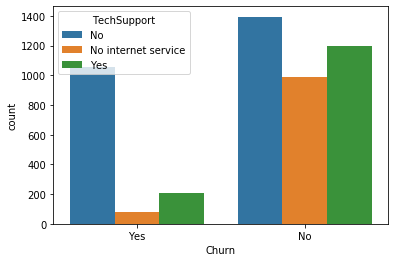

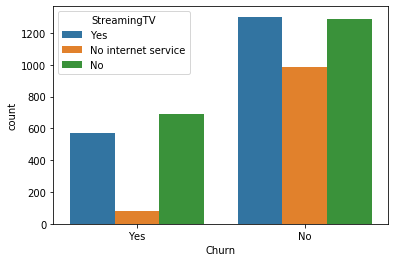

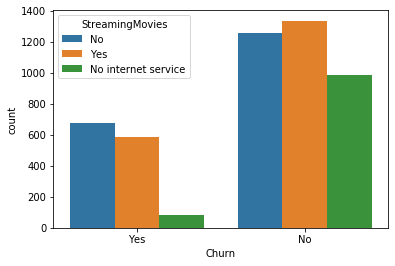

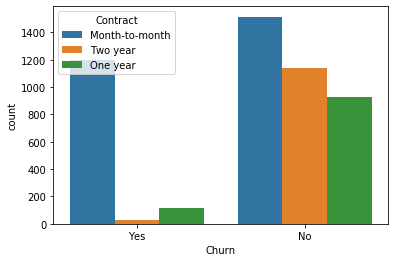

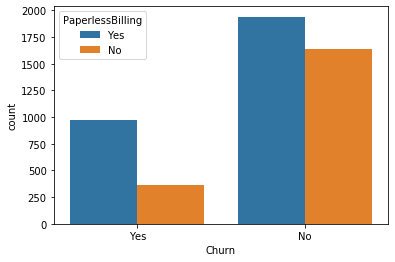

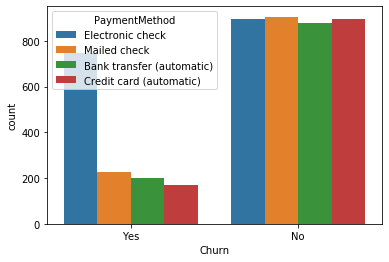

In [58]:
#Conduct some univariate descriptive analysis on each independent variable
for i in categorical_headers:
    bplot = sn.countplot(hue=X_train[i], x=Y_train, data=df)
    plt.show()

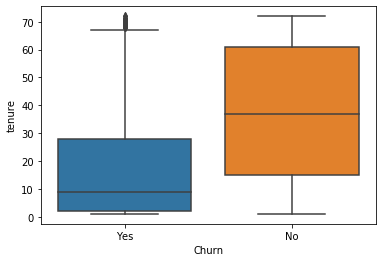

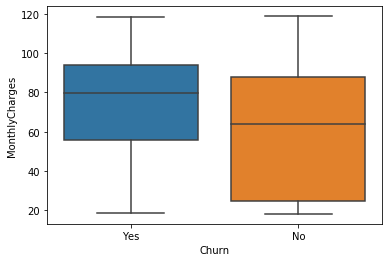

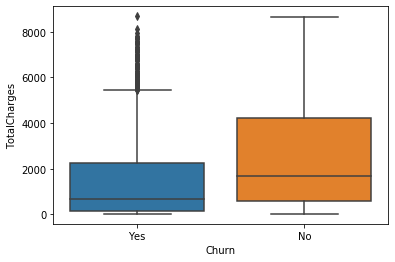

In [59]:
#For non-categorical headers, we can do a boxplot
bxplot = sn.boxplot(y=X_train['tenure'],x=Y_train,data=df)
plt.show()

bxplot = sn.boxplot(y=X_train['MonthlyCharges'],x=Y_train,data=df)
plt.show()

bxplot = sn.boxplot(y=X_train['TotalCharges'],x=Y_train,data=df)
plt.show()


In [60]:
#Is the dataset balanced?
Y_train.columns = ['Index','Churn']
length = len(Y_train)
yes_count = 0
for i in Y_train:
    if i == 'Yes':
        yes_count += 1

churn_percentage = yes_count/length
non_churn_percentage = 1- churn_percentage

print("There is about %.2f%% non-churn customers and %.2f%% percentage churn customers in this dataset." %(non_churn_percentage*100, churn_percentage*100))

There is about 72.71% non-churn customers and 27.29% percentage churn customers in this dataset.


### Some preliminary ideas about each independent variable on churn-rate:
 - Gender doesnt seem to play a huge role
 - If you dont have a partner you might be more likely to churn
 - If you have no dependents you might be more likely to churn
 - Most of the churn customers come from those with phone service
 - For customers with internet service it seems those with fiber optics have a higher churn rate
 - Those likely to churn have no online backup and no device protection and no tech support
 - Customers on a month-to-month contract have a higher likelihood of churning
 - And those who pay by electronic check seem to have a higher likelihood of churning
 - Customers who churn have a significantly lower tenure with the company
 - Customers who churn might have a higher range of monthly charges, and there are a lot of outliers where their total charges are very high


## Preprocessing the Data

In [3]:
#Create dummy variables for all the categorical data 

variables = ['gender','Partner','Dependents','PhoneService','PaperlessBilling']

for i in variables:
    X_train[i] = pd.get_dummies(X_train[i],drop_first=True)
    X_test[i] = pd.get_dummies(X_test[i],drop_first=True)


multiple_variables = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for var in multiple_variables:
    cat_list='var'+'_'+ var
    cat_list = pd.get_dummies(X_train[var],drop_first= True,prefix=var)
    cat_list_test = pd.get_dummies(X_test[var],drop_first=True,prefix=var)
    new_data = X_train.join(cat_list,lsuffix='_left')
    new_data_test = X_test.join(cat_list_test,lsuffix='_left')
    X_train = new_data
    X_test = new_data_test


C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
data_vars=X_train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in multiple_variables]
X_train_final=X_train[to_keep]
X_test_final = X_test[to_keep]

column_names = X_train_final.columns

In [5]:
Y_train = pd.get_dummies(Y_train,drop_first=True)
Y_test = pd.get_dummies(Y_test,drop_first=True)
Y_train.columns = ['Churn']
Y_test.columns = ['Churn']

In [6]:
#Now all categorical variables have been taken care of. Let's do some scaling for the variables of tenure, monthly charges and total charges

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_final)

# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test_final)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = column_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = column_names)


## Question 2 - Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1).fit(X_train_scaled,Y_train)

index = 0
for i in clf.coef_[0]:
    print("%s      %.5f" %(column_names[index],i))
    index += 1

gender      -0.05967
SeniorCitizen      0.17719
Partner      0.00551
Dependents      -0.14797
tenure      -3.18325
PhoneService      -0.27033
PaperlessBilling      0.14752
MonthlyCharges      0.01253
TotalCharges      1.44768
MultipleLines_No phone service      0.20211
MultipleLines_Yes      0.15820
InternetService_Fiber optic      0.85594
InternetService_No      -0.12838
OnlineSecurity_No internet service      -0.12838
OnlineSecurity_Yes      -0.40794
OnlineBackup_No internet service      -0.12838
OnlineBackup_Yes      -0.11574
DeviceProtection_No internet service      -0.12838
DeviceProtection_Yes      -0.06668
TechSupport_No internet service      -0.12838
TechSupport_Yes      -0.47248
StreamingTV_No internet service      -0.12838
StreamingTV_Yes      0.21135
StreamingMovies_No internet service      -0.12838
StreamingMovies_Yes      0.24646
Contract_One year      -0.76748
Contract_Two year      -1.46478
PaymentMethod_Credit card (automatic)      -0.13056
PaymentMethod_Electronic chec

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print('Accuracy of Logistic regression classifier on training set: {:.5f}'
     .format(clf.score(X_train_scaled, Y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.5f}'
     .format(clf.score(X_test_scaled, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.80110
Accuracy of Logistic regression classifier on test set: 0.80000


Based on this preliminary model, we can see that some of the most important variables are tenure, total charges, contracts, and perhaps internet service. Let's create a separate model with just these independent variables. We can run a basic RFE analysis to select the most important features, along with our intuition.

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 8)
rfe = rfe.fit(X_train_scaled, Y_train.values.ravel())

index = 0
for i in column_names:
    print("%s  %s  %s" %(i,rfe.support_[index],rfe.ranking_[index] ))
    index += 1

gender  False  21
SeniorCitizen  False  9
Partner  False  23
Dependents  False  13
tenure  True  1
PhoneService  False  10
PaperlessBilling  False  15
MonthlyCharges  False  22
TotalCharges  True  1
MultipleLines_No phone service  True  1
MultipleLines_Yes  False  12
InternetService_Fiber optic  True  1
InternetService_No  False  7
OnlineSecurity_No internet service  False  5
OnlineSecurity_Yes  False  3
OnlineBackup_No internet service  False  2
OnlineBackup_Yes  False  17
DeviceProtection_No internet service  True  1
DeviceProtection_Yes  False  20
TechSupport_No internet service  False  11
TechSupport_Yes  True  1
StreamingTV_No internet service  False  14
StreamingTV_Yes  False  8
StreamingMovies_No internet service  False  16
StreamingMovies_Yes  False  4
Contract_One year  True  1
Contract_Two year  True  1
PaymentMethod_Credit card (automatic)  False  18
PaymentMethod_Electronic check  False  6
PaymentMethod_Mailed check  False  19


In [68]:
#Lets take the most important 8 features that RFE identified and put a model from it

X_train_impt = X_train_scaled[['tenure','PaperlessBilling','TotalCharges','DeviceProtection_No internet service', 'TechSupport_No internet service','Contract_One year','Contract_Two year', 'InternetService_Fiber optic','PaymentMethod_Electronic check']]
X_test_impt = X_test_scaled[['tenure','PaperlessBilling','TotalCharges','DeviceProtection_No internet service', 'TechSupport_No internet service','Contract_One year','Contract_Two year', 'InternetService_Fiber optic','PaymentMethod_Electronic check']]

In [69]:
clf_2 = LogisticRegression(C=100).fit(X_train_impt,Y_train)

index = 0
for i in clf_2.coef_[0]:
    print("%s      %.5f" %(X_train_impt.columns[index],i))
    index += 1

tenure      -4.12185
PaperlessBilling      0.21132
TotalCharges      2.70007
DeviceProtection_No internet service      -0.40939
TechSupport_No internet service      -0.40939
Contract_One year      -0.87324
Contract_Two year      -1.75739
InternetService_Fiber optic      0.87866
PaymentMethod_Electronic check      0.39441


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
print('Accuracy of Logistic regression classifier on training set: {:.5f}'
     .format(clf_2.score(X_train_impt, Y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.5f}'
     .format(clf_2.score(X_test_impt, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.79581
Accuracy of Logistic regression classifier on test set: 0.80474


The accuracy on the test set has increased only slightly. Lets play around with the c-value.

In [74]:
list_of_c = [0.01,0.1,1,10,100,1000]

for c in list_of_c:
    clf_3 = LogisticRegression(C=c).fit(X_train_impt,Y_train)
    print('Accuracy of Logistic regression classifier on training set for C={:.2f}: {:.5f}'
         .format(c,clf_3.score(X_train_impt, Y_train)))

    print('Accuracy of Logistic regression classifier on test set for C={:.2f}: {:.5f}'
         .format(c,clf_3.score(X_test_impt, Y_test)))

Accuracy of Logistic regression classifier on training set for C=0.01: 0.78850
Accuracy of Logistic regression classifier on test set for C=0.01: 0.80000
Accuracy of Logistic regression classifier on training set for C=0.10: 0.79134
Accuracy of Logistic regression classifier on test set for C=0.10: 0.79953
Accuracy of Logistic regression classifier on training set for C=1.00: 0.79500
Accuracy of Logistic regression classifier on test set for C=1.00: 0.80427
Accuracy of Logistic regression classifier on training set for C=10.00: 0.79602
Accuracy of Logistic regression classifier on test set for C=10.00: 0.80521
Accuracy of Logistic regression classifier on training set for C=100.00: 0.79581
Accuracy of Logistic regression classifier on test set for C=100.00: 0.80474
Accuracy of Logistic regression classifier on training set for C=1000.00: 0.79581
Accuracy of Logistic regression classifier on test set for C=1000.00: 0.80474


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\phion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\phion\Anaconda3\lib\site-packages\sklearn\linear_

It looks like C=10 gives the most accurate value for this set of X. 

In [75]:
clf_4 = LogisticRegression(C=10).fit(X_train_impt,Y_train)

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
#Evaluation of the current model

print('Accuracy of Logistic regression classifier on training set: {:.5f}'
     .format(clf_4.score(X_train_impt, Y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.5f}'
     .format(clf_4.score(X_test_impt, Y_test)))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(Y_test, clf_4.predict(X_test_impt))
confusion_matrix

Accuracy of Logistic regression classifier on training set: 0.79602
Accuracy of Logistic regression classifier on test set: 0.80521


array([[1412,  172],
       [ 239,  287]], dtype=int64)

In [77]:
print(classification_report(Y_test, clf_4.predict(X_test_impt)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1584
           1       0.63      0.55      0.58       526

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



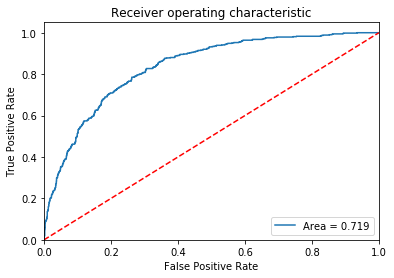

In [78]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(predict1,predict2):
    logit_roc_auc = roc_auc_score(Y_test, predict1)
    fpr, tpr, thresholds = roc_curve(Y_test, predict2)
    plt.figure()
    plt.plot(fpr, tpr, label='Area = %0.3f' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    

plot_roc_curve(clf_4.predict(X_test_impt),clf_4.predict_proba(X_test_impt)[:,1])

In [ ]:
f1_score(y_test)

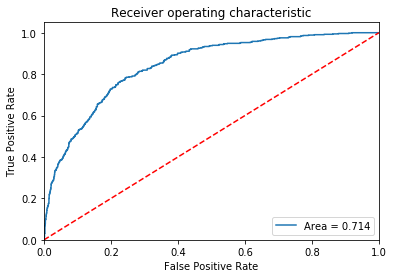

In [79]:
#Lets plot the same graph for our preliminary model to compare the results

plot_roc_curve(clf.predict(X_test_scaled),clf.predict_proba(X_test_scaled)[:,1])

It seems for the AUC, the first model which included only the 8 important variables performed better. Hence we choose that model over the model that included all the variables. 

## Question 3 - SVC Models


In [80]:
from sklearn.svm import SVC

#First, we use linear SVC models and vary the level of C, and check their accuracy

list_of_C = [0.01,0.1,1,10,100]

for i in list_of_C:
    svc_1 = SVC(kernel = 'linear', C=i).fit(X_train_scaled, Y_train)
    print('Accuracy of SVC Model on training set for C={:.2f}: {:.5f}'.format(i,svc_1.score(X_train_scaled, Y_train)))
    print('Accuracy of SVC Model on test set for C={:.2f}: {:.5f}'.format(i,svc_1.score(X_test_scaled, Y_test)))

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=0.01: 0.79785
Accuracy of SVC Model on test set for C=0.01: 0.79668


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=0.10: 0.79846
Accuracy of SVC Model on test set for C=0.10: 0.80190


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=1.00: 0.79886
Accuracy of SVC Model on test set for C=1.00: 0.80379


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=10.00: 0.79744
Accuracy of SVC Model on test set for C=10.00: 0.80379


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=100.00: 0.79724
Accuracy of SVC Model on test set for C=100.00: 0.80332


It seems from the above result that C = 1 yields the highest training and test score together. Lets look at the same linear kernel but with the data set with reduced number of X variables.

In [81]:
for i in list_of_C:
    svc_2 = SVC(kernel = 'linear', C=i).fit(X_train_impt, Y_train)
    print('Accuracy of SVC Model on training set for C={:.2f}: {:.5f}'.format(i,svc_2.score(X_train_impt, Y_train)))
    print('Accuracy of SVC Model on test set for C={:.2f}: {:.5f}'.format(i,svc_2.score(X_test_impt, Y_test)))

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=0.01: 0.79074
Accuracy of SVC Model on test set for C=0.01: 0.79763


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=0.10: 0.78444
Accuracy of SVC Model on test set for C=0.10: 0.79479


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=1.00: 0.78261
Accuracy of SVC Model on test set for C=1.00: 0.79573


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=10.00: 0.78241
Accuracy of SVC Model on test set for C=10.00: 0.79526


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model on training set for C=100.00: 0.78302
Accuracy of SVC Model on test set for C=100.00: 0.79479


On average, it doesnt seem to perform better, because there are less variables. 

In [102]:
#Evaluation of linear model for C = 1 for data set with all X variables
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_3 = SVC(kernel = 'linear', C=1).fit(X_train_scaled, Y_train)

print(confusion_matrix(Y_test, svc_3.predict(X_test_scaled)))
print(classification_report(Y_test,svc_3.predict(X_test_scaled)))

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1412  172]
 [ 242  284]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1584
           1       0.62      0.54      0.58       526

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



In [83]:
#Now lets try non-linear kernels

list_of_gamma = [0.01,0.1,1,10]
for i in list_of_gamma:
    svc_4 = SVC(kernel='rbf',gamma=i).fit(X_train_scaled,Y_train)

    print('Accuracy of SVC Model with RBF Kernel on training set for Gamma={:.3f}: {:.5f}'.format(i,svc_4.score(X_train_scaled, Y_train)))
    print('Accuracy of SVC Model on RBF Kernel test set for Gamma={:.3f}: {:.5f}'.format(i,svc_4.score(X_test_scaled, Y_test)))

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with RBF Kernel on training set for Gamma=0.010: 0.79581
Accuracy of SVC Model on RBF Kernel test set for Gamma=0.010: 0.79763


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with RBF Kernel on training set for Gamma=0.100: 0.80760
Accuracy of SVC Model on RBF Kernel test set for Gamma=0.100: 0.80237


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with RBF Kernel on training set for Gamma=1.000: 0.90837
Accuracy of SVC Model on RBF Kernel test set for Gamma=1.000: 0.77346


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with RBF Kernel on training set for Gamma=10.000: 0.94494
Accuracy of SVC Model on RBF Kernel test set for Gamma=10.000: 0.76730


It looks like gamma = 0.1 yields the best result. Anything higher than that seems to have the problem of overfitting. Now lets try the SVM model with a polynomial kernel. 

In [84]:
list_of_degrees = [2,3,4,5,6]

for i in list_of_degrees:
    svc_5 = SVC(kernel='poly',degree=i,gamma=0.1).fit(X_train_scaled,Y_train)
    print('Accuracy of SVC Model with Poly Kernel on training set for Gamma=0.1, degree= {:1d}: {:.5f}'.format(i,svc_5.score(X_train_scaled, Y_train)))
    print('Accuracy of SVC Model on Poly Kernel test set for Gamma=0.1, degree= {:1d}: {:.5f}'.format(i,svc_5.score(X_test_scaled, Y_test)))

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with Poly Kernel on training set for Gamma=0.1, degree= 2: 0.80110
Accuracy of SVC Model on Poly Kernel test set for Gamma=0.1, degree= 2: 0.79573


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with Poly Kernel on training set for Gamma=0.1, degree= 3: 0.79967
Accuracy of SVC Model on Poly Kernel test set for Gamma=0.1, degree= 3: 0.80000


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with Poly Kernel on training set for Gamma=0.1, degree= 4: 0.79683
Accuracy of SVC Model on Poly Kernel test set for Gamma=0.1, degree= 4: 0.79858


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with Poly Kernel on training set for Gamma=0.1, degree= 5: 0.79622
Accuracy of SVC Model on Poly Kernel test set for Gamma=0.1, degree= 5: 0.79573


C:\Users\phion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC Model with Poly Kernel on training set for Gamma=0.1, degree= 6: 0.79134
Accuracy of SVC Model on Poly Kernel test set for Gamma=0.1, degree= 6: 0.79242


For SVM with poly kernel, the degree of 3 has the best accuracy on the test set. Overall, it seems like linear model, with C=1 yields the highest test accuracy. For that model, the recall rate is 54%, and the precision rate is 62%, and the overall score is 79.5%.

## Question 4: Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

tree_1 = DecisionTreeClassifier(max_depth=5,criterion='entropy',max_features=8)
tree_1.fit(X_train_scaled,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
print("Accuracy for Decision Tree Training set: %.5f" %(tree_1.score(X_train_scaled,Y_train)))
print("Accuracy for Decision Tree Test set: %.5f" %(tree_1.score(X_test_scaled,Y_test)))

Accuracy for Decision Tree Training set: 0.77326
Accuracy for Decision Tree Test set: 0.78673


In [9]:
print(confusion_matrix(Y_test,tree_1.predict(X_test_scaled)))
print(classification_report(Y_test,tree_1.predict(X_test_scaled)))

NameError: name 'confusion_matrix' is not defined

Based on this preliminary model, we can vary the max depth and max features parameters to get a higher accuracy. 

In [10]:
list_of_max_depth = [3,4,5,6,7,8,9]
list_of_max_features = [8,10,12,14,16,18,20]

for i in list_of_max_depth:
    for j in list_of_max_features:
        tree_2 = DecisionTreeClassifier(max_depth=i,criterion='entropy',max_features=j,random_state=0)
        tree_2.fit(X_train_scaled,Y_train)
        print("Accuracy for Decision Tree Training set, Max Depth: %i Max Features: %i : %.5f" %(i,j,tree_2.score(X_train_scaled,Y_train)))
        print("Accuracy for Decision Tree Test set, Max Depth: %i Max Features: %i : %.5f" %(i,j,tree_2.score(X_test_scaled,Y_test)))
        print("")


Accuracy for Decision Tree Training set, Max Depth: 3 Max Features: 8 : 0.75071
Accuracy for Decision Tree Test set, Max Depth: 3 Max Features: 8 : 0.76114

Accuracy for Decision Tree Training set, Max Depth: 3 Max Features: 10 : 0.75823
Accuracy for Decision Tree Test set, Max Depth: 3 Max Features: 10 : 0.76209

Accuracy for Decision Tree Training set, Max Depth: 3 Max Features: 12 : 0.79074
Accuracy for Decision Tree Test set, Max Depth: 3 Max Features: 12 : 0.78531

Accuracy for Decision Tree Training set, Max Depth: 3 Max Features: 14 : 0.78870
Accuracy for Decision Tree Test set, Max Depth: 3 Max Features: 14 : 0.79289

Accuracy for Decision Tree Training set, Max Depth: 3 Max Features: 16 : 0.78870
Accuracy for Decision Tree Test set, Max Depth: 3 Max Features: 16 : 0.79289

Accuracy for Decision Tree Training set, Max Depth: 3 Max Features: 18 : 0.76473
Accuracy for Decision Tree Test set, Max Depth: 3 Max Features: 18 : 0.75592

Accuracy for Decision Tree Training set, Max Dep

In [11]:
tree_2.feature_importances_

array([0.00820681, 0.00444842, 0.00839529, 0.00788422, 0.10106177,
       0.00505476, 0.01053059, 0.12494953, 0.18881396, 0.        ,
       0.00671332, 0.12418175, 0.        , 0.        , 0.0095301 ,
       0.        , 0.01098232, 0.        , 0.        , 0.        ,
       0.01688546, 0.00525536, 0.00363614, 0.        , 0.00604273,
       0.08552377, 0.24803022, 0.00622209, 0.00797105, 0.00968033])

It seems like the highest accuracy for the test set is with the parameters of max depth = 7 and max features = 14. 

In [89]:
tree_3 = DecisionTreeClassifier(max_depth=7,criterion="entropy",max_features=14,random_state=0)
tree_3.fit(X_train_scaled,Y_train)

print("Accuracy for Decision Tree Training set: %.5f" %(tree_3.score(X_train_scaled,Y_train)))
print("Accuracy for Decision Tree Test set: %.5f" %(tree_3.score(X_test_scaled,Y_test)))


print(confusion_matrix(Y_test,tree_3.predict(X_test_scaled)))
print(classification_report(Y_test,tree_3.predict(X_test_scaled)))

Accuracy for Decision Tree Training set: 0.81654
Accuracy for Decision Tree Test set: 0.79858
[[1420  164]
 [ 261  265]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1584
           1       0.62      0.50      0.55       526

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



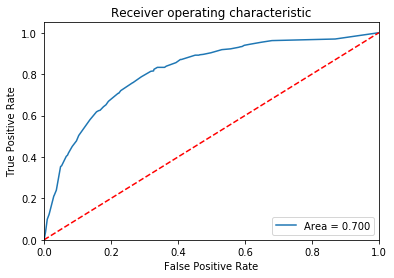

In [90]:
#For the best-performing decision tree model, plot an ROC curve

plot_roc_curve(tree_3.predict(X_test_scaled),tree_3.predict_proba(X_test_scaled)[:,1])

The precision rate is 62%, and the recall rate is 50% for this decision tree model, and its AUC is 0.700.

In [91]:
#Creating random forest models

from sklearn.ensemble import RandomForestClassifier

rf_1 =RandomForestClassifier(n_estimators=100,criterion="entropy")
rf_1.fit(X_train_scaled,Y_train)

C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
print("Accuracy for Random Forest Training set: %.5f" %(rf_1.score(X_train_scaled,Y_train)))
print("Accuracy for Random Forest Test set: %.5f" %(rf_1.score(X_test_scaled,Y_test)))

Accuracy for Random Forest Training set: 0.99797
Accuracy for Random Forest Test set: 0.79716


In [93]:
print(confusion_matrix(Y_test,rf_1.predict(X_test_scaled)))
print(classification_report(Y_test,rf_1.predict(X_test_scaled)))

[[1414  170]
 [ 258  268]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1584
           1       0.61      0.51      0.56       526

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



For random forest, the accuracy for training set is very high, but unfortunately is much lower for the test set. Let's play around with the n_estimators and max_features parameters.


In [94]:
list_of_n_estimators = [30,50,80,100,120]
max_features = [5,8,10,15,20]

for i in list_of_n_estimators:
    for j in max_features:
        rf_2 =RandomForestClassifier(n_estimators=i, max_features=j, criterion="entropy",random_state=0)
        rf_2.fit(X_train_scaled,Y_train)
        print("Accuracy for Random Forest Training set, n estimator: %i Max Features: %i : %.5f" %(i,j,rf_2.score(X_train_scaled,Y_train)))
        print("Accuracy for Random Forest Test set, n estimator: %i Max Features: %i : %.5f" %(i,j,rf_2.score(X_test_scaled,Y_test)))
        print("")

C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 30 Max Features: 5 : 0.99512
Accuracy for Random Forest Test set, n estimator: 30 Max Features: 5 : 0.78626



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 30 Max Features: 8 : 0.99573
Accuracy for Random Forest Test set, n estimator: 30 Max Features: 8 : 0.78768



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 30 Max Features: 10 : 0.99553
Accuracy for Random Forest Test set, n estimator: 30 Max Features: 10 : 0.79526



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 30 Max Features: 15 : 0.99533
Accuracy for Random Forest Test set, n estimator: 30 Max Features: 15 : 0.79431



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 30 Max Features: 20 : 0.99512
Accuracy for Random Forest Test set, n estimator: 30 Max Features: 20 : 0.79289



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 50 Max Features: 5 : 0.99797
Accuracy for Random Forest Test set, n estimator: 50 Max Features: 5 : 0.79194



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 50 Max Features: 8 : 0.99797
Accuracy for Random Forest Test set, n estimator: 50 Max Features: 8 : 0.79005



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 50 Max Features: 10 : 0.99736
Accuracy for Random Forest Test set, n estimator: 50 Max Features: 10 : 0.79668



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 50 Max Features: 15 : 0.99777
Accuracy for Random Forest Test set, n estimator: 50 Max Features: 15 : 0.79100



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 50 Max Features: 20 : 0.99756
Accuracy for Random Forest Test set, n estimator: 50 Max Features: 20 : 0.79147



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 80 Max Features: 5 : 0.99797
Accuracy for Random Forest Test set, n estimator: 80 Max Features: 5 : 0.79384



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 80 Max Features: 8 : 0.99797
Accuracy for Random Forest Test set, n estimator: 80 Max Features: 8 : 0.79431



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 80 Max Features: 10 : 0.99797
Accuracy for Random Forest Test set, n estimator: 80 Max Features: 10 : 0.79953



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 80 Max Features: 15 : 0.99797
Accuracy for Random Forest Test set, n estimator: 80 Max Features: 15 : 0.79289



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 80 Max Features: 20 : 0.99797
Accuracy for Random Forest Test set, n estimator: 80 Max Features: 20 : 0.79052



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 100 Max Features: 5 : 0.99797
Accuracy for Random Forest Test set, n estimator: 100 Max Features: 5 : 0.79621



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 100 Max Features: 8 : 0.99797
Accuracy for Random Forest Test set, n estimator: 100 Max Features: 8 : 0.79810



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 100 Max Features: 10 : 0.99797
Accuracy for Random Forest Test set, n estimator: 100 Max Features: 10 : 0.80047



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 100 Max Features: 15 : 0.99797
Accuracy for Random Forest Test set, n estimator: 100 Max Features: 15 : 0.79479



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 100 Max Features: 20 : 0.99797
Accuracy for Random Forest Test set, n estimator: 100 Max Features: 20 : 0.79289



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 120 Max Features: 5 : 0.99797
Accuracy for Random Forest Test set, n estimator: 120 Max Features: 5 : 0.79763



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 120 Max Features: 8 : 0.99797
Accuracy for Random Forest Test set, n estimator: 120 Max Features: 8 : 0.79810



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 120 Max Features: 10 : 0.99797
Accuracy for Random Forest Test set, n estimator: 120 Max Features: 10 : 0.80142



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 120 Max Features: 15 : 0.99797
Accuracy for Random Forest Test set, n estimator: 120 Max Features: 15 : 0.79242



C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy for Random Forest Training set, n estimator: 120 Max Features: 20 : 0.99797
Accuracy for Random Forest Test set, n estimator: 120 Max Features: 20 : 0.79573



With an n_estimator of 120 and max features = 10, random forest achieved a 80.142% accuracy on the test set. 

In [43]:
rf_3 =RandomForestClassifier(n_estimators=120, max_features=10, criterion="entropy",random_state=0)
rf_3.fit(X_train_scaled,Y_train)

print("Accuracy for Random Forest Training set, n estimator: 50 Max Features: 10 : %.5f" %(rf_3.score(X_train_scaled,Y_train)))
print("Accuracy for Random Forest Test set, n estimator: 50 Max Features: 10 : %.5f" %(rf_3.score(X_test_scaled,Y_test)))
print("")
print(confusion_matrix(Y_test,rf_3.predict(X_test_scaled)))
print(classification_report(Y_test,rf_3.predict(X_test_scaled)))

C:\Users\phion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for Random Forest Training set, n estimator: 50 Max Features: 10 : 0.99797
Accuracy for Random Forest Test set, n estimator: 50 Max Features: 10 : 0.80142

[[1414  170]
 [ 249  277]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1584
           1       0.62      0.53      0.57       526

    accuracy                           0.80      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.80      0.80      2110



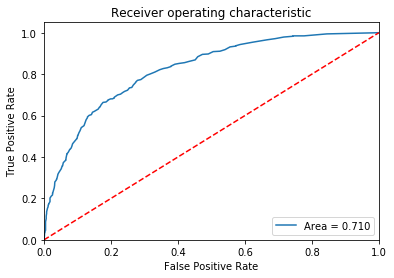

In [44]:
plot_roc_curve(rf_3.predict(X_test_scaled),rf_3.predict_proba(X_test_scaled)[:,1])

Its precision and recall percentages are 62% and 53%, which are higher than the model which uses a single decision tree, and its AUC is 0.710, as compared to 0.700 for a single decision tree.

In [95]:
#Lets build GBDT models

from sklearn.ensemble import GradientBoostingClassifier

grd = GradientBoostingClassifier(n_estimators=50)
grd.fit(X_train_scaled,Y_train)

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [96]:
print("Accuracy for Gradient Boosting Decision Tree Training set: %.5f" %(grd.score(X_train_scaled,Y_train)))
print("Accuracy for Gradient Boosting Decision Tree Test set: %.5f" %(grd.score(X_test_scaled,Y_test)))

Accuracy for Gradient Boosting Decision Tree Training set: 0.81471
Accuracy for Gradient Boosting Decision Tree Test set: 0.80616


In [97]:
print(confusion_matrix(Y_test,grd.predict(X_test_scaled)))
print(classification_report(Y_test,grd.predict(X_test_scaled)))

[[1431  153]
 [ 256  270]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1584
           1       0.64      0.51      0.57       526

    accuracy                           0.81      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



In [98]:
#Lets play around with the max_depth and max_features variables

list_of_max_depth = [3,4,5,6,7,8]
list_of_max_features = [10, 15, 20]

for i in list_of_max_depth:
    for j in list_of_max_features:
        grd_2 =GradientBoostingClassifier(max_depth=i, max_features=j,n_estimators=50,random_state=0)
        grd_2.fit(X_train_scaled,Y_train)
        print("Accuracy for GBDT Training set, Max Depth: %i Max Features: %i : %.5f" %(i,j,grd_2.score(X_train_scaled,Y_train)))
        print("Accuracy for GBDT Forest Test set, Max Depth: %i Max Features: %i : %.5f" %(i,j,grd_2.score(X_test_scaled,Y_test)))
        print("")

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 3 Max Features: 10 : 0.81329
Accuracy for GBDT Forest Test set, Max Depth: 3 Max Features: 10 : 0.80616



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 3 Max Features: 15 : 0.81308
Accuracy for GBDT Forest Test set, Max Depth: 3 Max Features: 15 : 0.80379



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 3 Max Features: 20 : 0.81207
Accuracy for GBDT Forest Test set, Max Depth: 3 Max Features: 20 : 0.80379



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 4 Max Features: 10 : 0.81979
Accuracy for GBDT Forest Test set, Max Depth: 4 Max Features: 10 : 0.80995



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 4 Max Features: 15 : 0.82629
Accuracy for GBDT Forest Test set, Max Depth: 4 Max Features: 15 : 0.80758



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 4 Max Features: 20 : 0.82284
Accuracy for GBDT Forest Test set, Max Depth: 4 Max Features: 20 : 0.80616



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 5 Max Features: 10 : 0.83401
Accuracy for GBDT Forest Test set, Max Depth: 5 Max Features: 10 : 0.80190



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 5 Max Features: 15 : 0.83807
Accuracy for GBDT Forest Test set, Max Depth: 5 Max Features: 15 : 0.80474



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 5 Max Features: 20 : 0.84072
Accuracy for GBDT Forest Test set, Max Depth: 5 Max Features: 20 : 0.80095



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 6 Max Features: 10 : 0.85555
Accuracy for GBDT Forest Test set, Max Depth: 6 Max Features: 10 : 0.80284



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 6 Max Features: 15 : 0.86164
Accuracy for GBDT Forest Test set, Max Depth: 6 Max Features: 15 : 0.79810



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 6 Max Features: 20 : 0.86388
Accuracy for GBDT Forest Test set, Max Depth: 6 Max Features: 20 : 0.79763



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 7 Max Features: 10 : 0.89212
Accuracy for GBDT Forest Test set, Max Depth: 7 Max Features: 10 : 0.79905



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 7 Max Features: 15 : 0.89476
Accuracy for GBDT Forest Test set, Max Depth: 7 Max Features: 15 : 0.79573



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 7 Max Features: 20 : 0.90024
Accuracy for GBDT Forest Test set, Max Depth: 7 Max Features: 20 : 0.79621



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 8 Max Features: 10 : 0.93336
Accuracy for GBDT Forest Test set, Max Depth: 8 Max Features: 10 : 0.79716



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 8 Max Features: 15 : 0.93499
Accuracy for GBDT Forest Test set, Max Depth: 8 Max Features: 15 : 0.79147



C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for GBDT Training set, Max Depth: 8 Max Features: 20 : 0.94494
Accuracy for GBDT Forest Test set, Max Depth: 8 Max Features: 20 : 0.79479



It seems like max depth = 4 and max features = 10 yields the best accuracy on the test set. When max depth and max features are too high they face the problem of overfitting.

In [99]:
grd_3 = GradientBoostingClassifier(max_depth=4, max_features=10,n_estimators=50,random_state=0).fit(X_train_scaled,Y_train)

print("Accuracy for Gradient Boosting Decision Tree Training set: %.5f" %(grd_3.score(X_train_scaled,Y_train)))
print("Accuracy for Gradient Boosting Decision Tree Test set: %.5f" %(grd_3.score(X_test_scaled,Y_test)))

print(confusion_matrix(Y_test,grd_3.predict(X_test_scaled)))
print(classification_report(Y_test,grd_3.predict(X_test_scaled)))

C:\Users\phion\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Gradient Boosting Decision Tree Training set: 0.81979
Accuracy for Gradient Boosting Decision Tree Test set: 0.80995
[[1425  159]
 [ 242  284]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1584
           1       0.64      0.54      0.59       526

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



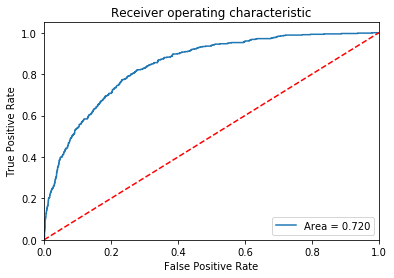

In [100]:
plot_roc_curve(grd_3.predict(X_test_scaled),grd_3.predict_proba(X_test_scaled)[:,1])

The GBDT Model acheived a precision rate of 64% and recall of 54%, with AUC of 0.720. That is higher than the single decision tree model as well as the random forest model. Hence we will choose this model.

## Question 5 - Final Evaluation

First, lets create a dummy model and see how our models accuracy compare to a dummy model.

In [51]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, Y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test_scaled)

print("The score for the dummy model is %.5f." %(dummy_majority.score(X_test_scaled, Y_test)))
print(confusion_matrix(Y_test, y_dummy_predictions))
#print(classification_report(Y_test,y_dummy_predictions))

The score for the dummy model is 0.75071.
[[1584    0]
 [ 526    0]]


All our best models have definitely performed better than a dummy majority model, proving that they are of value. Which model performed the best?

For this data set, we probably care more about the positive recall rate rather than precision. We want to know the customers who are highly likely to churn so we can reach out to them earlier to offer them incentives to stay, we probably care less about how much of those we are calling are actually high-risk customers, since we already have a reduced list of who to call. We want to make sure we capture those who are high-risk as much as possible. 

So we can choose the model that has the highest AUC, but also one that has the highest positive recall rate. We can also evaluate on which model is the least complex.

In [104]:
print("For Best Logistic Regression Model:")
print("Accuracy on test set: %.5f" %((clf_4.score(X_test_impt, Y_test))))
print("Positive Recall Rate: 55%")
print("AUC: %.5f" %( roc_auc_score(Y_test, clf_4.predict(X_test_impt))))
print("Number of Max Features: 8")

print("\nFor Best SVC Model:")
print("Accuracy on test set: %.5f" %((svc_3.score(X_test_scaled, Y_test))))
print("Positive Recall Rate: 54%")
print("AUC: %.5f" %( roc_auc_score(Y_test, svc_3.predict(X_test_scaled))))
print("Number of Max Features: 20 ")

print("\nFor Best Decision Tree Ensemble Model:")
print("Accuracy on test set: %.5f" %((grd_3.score(X_test_scaled, Y_test))))
print("Positive Recall Rate: 54%")
print("AUC: %.5f" %( roc_auc_score(Y_test, grd_3.predict(X_test_scaled))))
print("Number of Max Features: 10")


For Best Logistic Regression Model:
Accuracy on test set: 0.80521
Positive Recall Rate: 55%
AUC: 0.71852
Number of Max Features: 8

For Best SVC Model:
Accuracy on test set: 0.80379
Positive Recall Rate: 54%
AUC: 0.71567
Number of Max Features: 20 

For Best Decision Tree Ensemble Model:
Accuracy on test set: 0.80995
Positive Recall Rate: 54%
AUC: 0.71977
Number of Max Features: 10


Based on this, we will choose the GBDT model with these parameters: max_depth=4, max_features=10,n_estimators=50.

To further improve the model results, we could create a churn model for each type of customer (phone service customer, internet service customer etc). This way we could better predict the churn for each type of customer. Also, we could use cross-validation to segment the data so we can make sure that the the good results are not a result of being lucky with the random sampling. Another way to improve is balance out the data, since there is a higher proportion of non-churn customers as compared to churn customers in the dataset. These will improve our model.